## Goal:
### Explore the Diabetes dataset, clean data, perform analysis,
### and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the relationship between passenger features (Age, Sex, Class) and survival.

### 2. Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [9]:
df = pd.read_csv("diabetes_dataset.csv")
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


### 4. Explore Data

In [10]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (100000, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_

### Insights:
#### 1. Dataset has 768 patients and features like Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome.
#### 2. Missing values are represented as zeros in some columns.
#### 3. Understanding these helps guide data cleaning.

### 5. Data Cleaning

In [16]:
# Replace 0 with NaN for key numeric columns
cols_to_clean = ['bmi','waist_to_hip_ratio','systolic_bp','diastolic_bp','hdl_cholesterol',
                 'ldl_cholesterol','triglycerides','glucose_fasting','glucose_postprandial',
                 'insulin_level','hba1c','diet_score','sleep_hours_per_day','physical_activity_minutes_per_week']

df[cols_to_clean] = df[cols_to_clean].replace(0, np.nan)

# Fill missing values only in numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


### Insights:

#### 1.Ensures numeric calculations are accurate.

#### 2.Avoids bias due to zeros or missing lab values.

### 5. Basic Analysis with NumPy & Pandas

In [17]:
# Average age, BMI, and diabetes risk score
avg_age = df['age'].mean()
avg_bmi = df['bmi'].mean()
avg_risk = df['diabetes_risk_score'].mean()
print(f"Average Age: {avg_age}, Average BMI: {avg_bmi}, Average Diabetes Risk Score: {avg_risk}")

# Diabetes prevalence
diabetes_prev = df['diagnosed_diabetes'].mean()  # assuming 1 = diabetes, 0 = no
print("Diabetes Prevalence:", diabetes_prev)

# Average health metrics by diagnosed diabetes
health_by_diabetes = df.groupby('diagnosed_diabetes')[['bmi','glucose_fasting','glucose_postprandial','hba1c','insulin_level','systolic_bp']].mean()
print(health_by_diabetes)


Average Age: 50.12041, Average BMI: 25.612652999999998, Average Diabetes Risk Score: 30.222362
Diabetes Prevalence: 0.59998
                          bmi  glucose_fasting  glucose_postprandial  \
diagnosed_diabetes                                                     
0                   25.186321       102.610119            136.173041   
1                   25.896898       116.788926            175.944381   

                       hba1c  insulin_level  systolic_bp  
diagnosed_diabetes                                        
0                   5.843554       8.711073   114.129319  
1                   6.972295       9.294708   116.913230  


### Insights:

#### 1.Average age and BMI indicate general demographics.

#### 2.Diabetes prevalence shows the proportion of diagnosed cases.

#### 3.Higher glucose, BMI, insulin, and hba1c levels correlate with diagnosed diabetes.

### 6. Visualization with Matplotlib
#### 1. Diabetes Prevalence

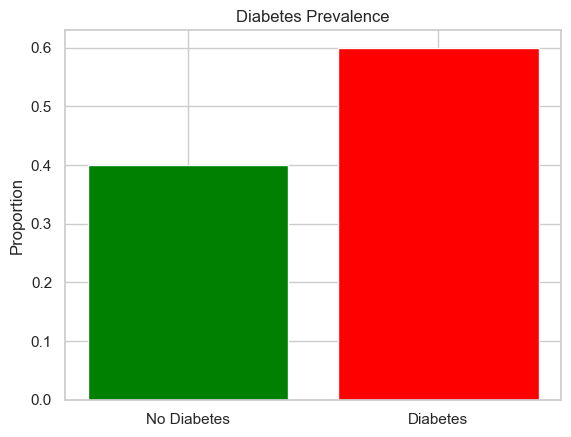

In [ ]:

diabetes_prev = df['diagnosed_diabetes'].mean()
plt.bar(['No Diabetes','Diabetes'], [1-diabetes_prev, diabetes_prev], color=['green','red'])
plt.title("Diabetes Prevalence")
plt.ylabel("Proportion")
plt.show()


### Insights:

#### 1.Shows the proportion of people diagnosed with diabetes.

#### 2.Helps identify overall risk in the population.

#### 3.Quick visual comparison: majority may be non-diabetic, minority diabetic

#### 2. Average BMI by Diabetes Status

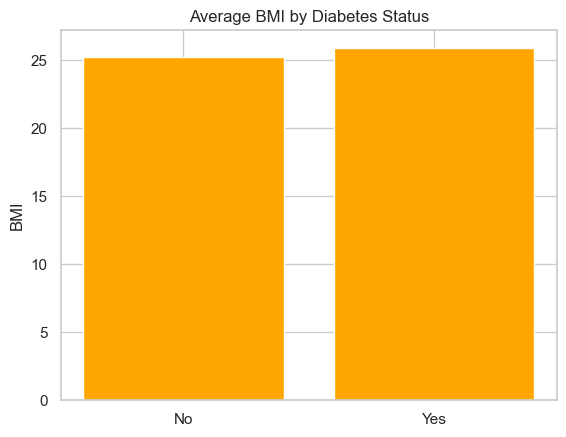

In [24]:
bmi_by_diabetes = df.groupby('diagnosed_diabetes')['bmi'].mean()
plt.bar(['No' if x==0 else 'Yes' for x in bmi_by_diabetes.index], bmi_by_diabetes.values, color='orange')
plt.title("Average BMI by Diabetes Status")
plt.ylabel("BMI")
plt.show()


### Insights:

#### 1.Diabetic individuals tend to have higher BMI than non-diabetic.

#### 2.Confirms that obesity is a major risk factor.


### 7. Visualization with Seaborn
#### Age distribution

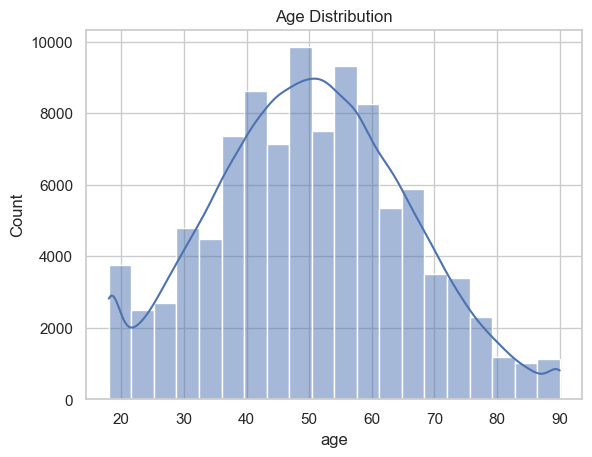

In [ ]:

sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

### Insights
#### 1.Most participants are adults between 30–60 years.
#### 2.Peak frequency is around middle-aged adults.
#### 3.Helps understand age demographics in the dataset.
 ### 2. Fasting Glucose by Diabetes Status

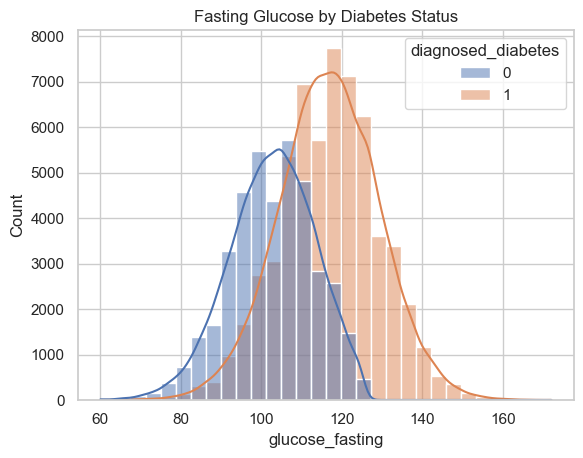

In [28]:
sns.histplot(df, x='glucose_fasting', hue='diagnosed_diabetes', bins=30, kde=True)
plt.title("Fasting Glucose by Diabetes Status")
plt.show()


### Insights
#### 1.Diabetic individuals have higher fasting glucose levels.
#### 2.Non-diabetic participants mostly have lower glucose levels.
#### 3.Confirms fasting glucose as a strong predictor of diabetes.
### 3. HbA1c by Diabetes Status (Boxplot)

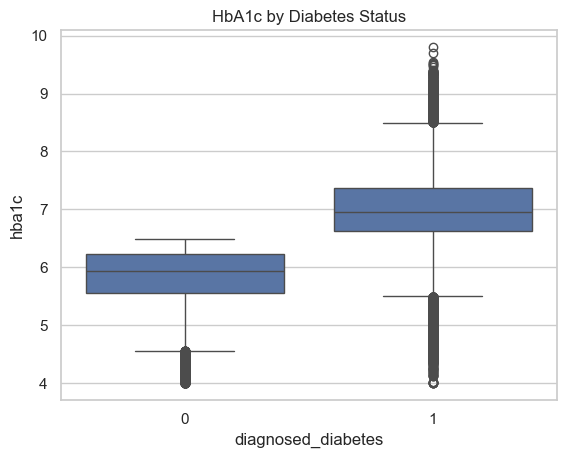

In [29]:
sns.boxplot(x='diagnosed_diabetes', y='hba1c', data=df)
plt.title("HbA1c by Diabetes Status")
plt.show()


### Insights
#### 1.HbA1c is significantly higher in diabetic participants.
#### 2.Boxplot shows median, spread, and outliers clearly.
#### 3.Highlights long-term blood sugar control differences.
### 4. Pairplot of Numeric Health Indicators

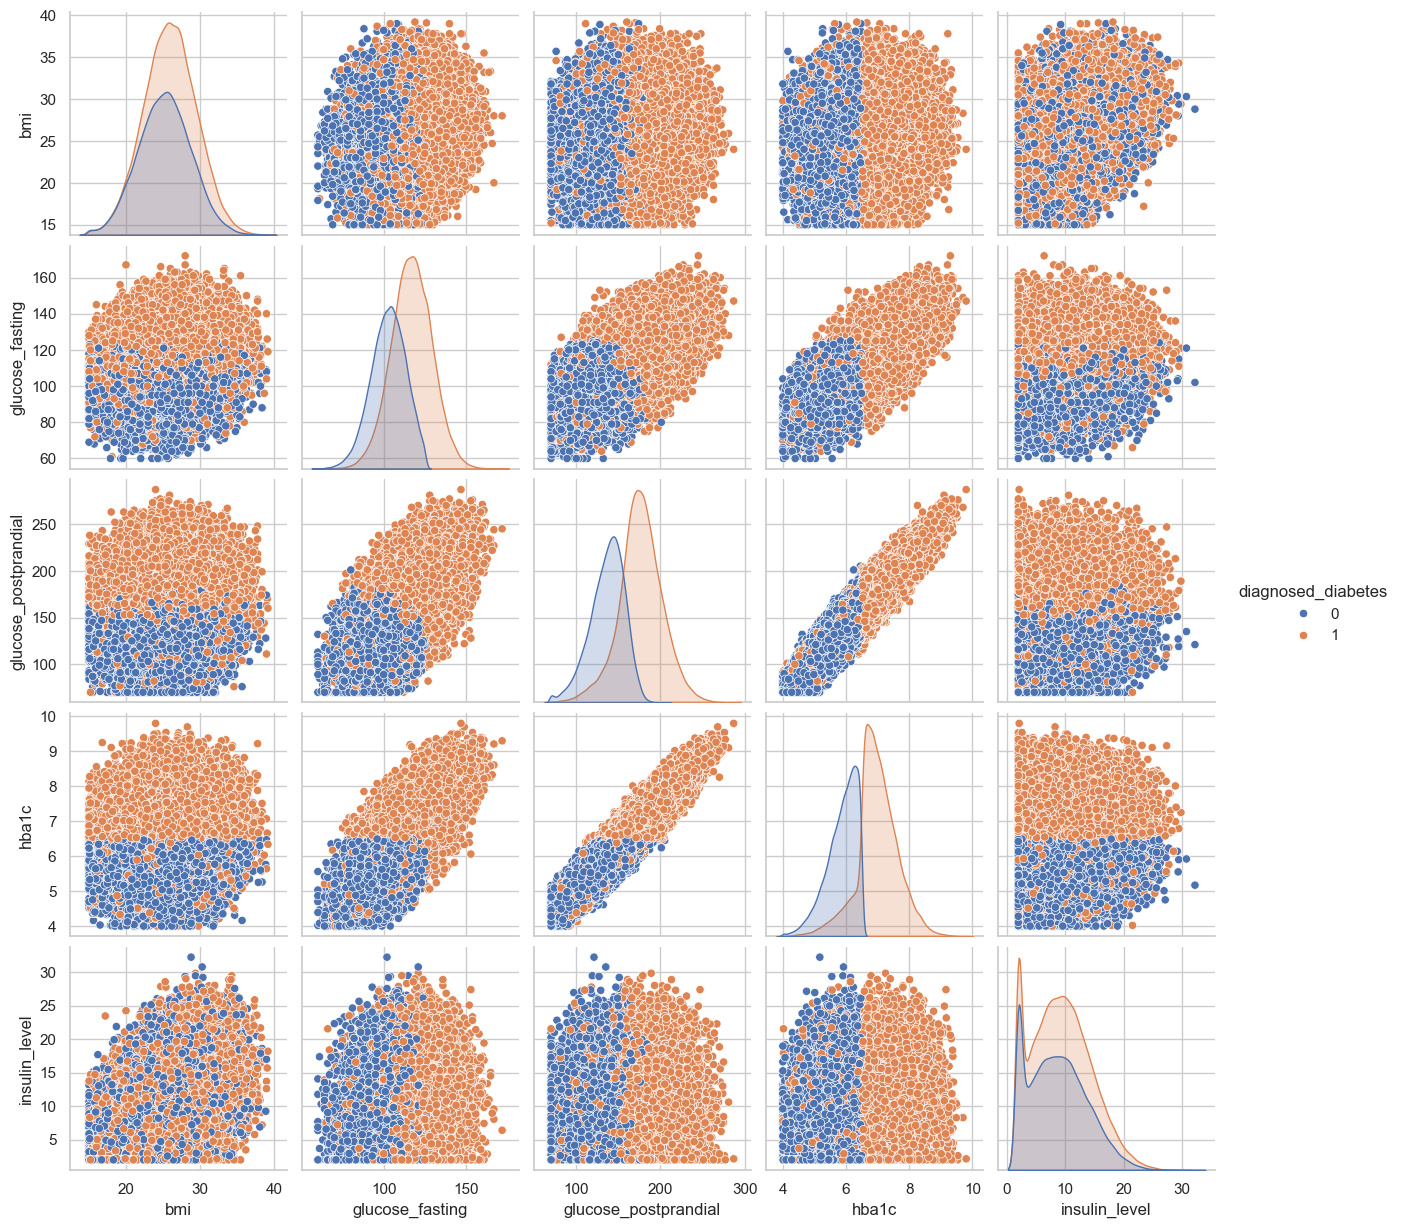

In [30]:
sns.pairplot(df[['bmi','glucose_fasting','glucose_postprandial','hba1c','insulin_level','diagnosed_diabetes']], hue='diagnosed_diabetes')
plt.show()


### Insights
#### 1.Shows relationships between BMI, glucose, HbA1c, insulin, and diabetes status.
#### 2.Diabetic group tends to cluster with higher BMI and glucose levels.
#### 3.Helps identify patterns for risk factors visually.
### 5. Correlation Heatmap

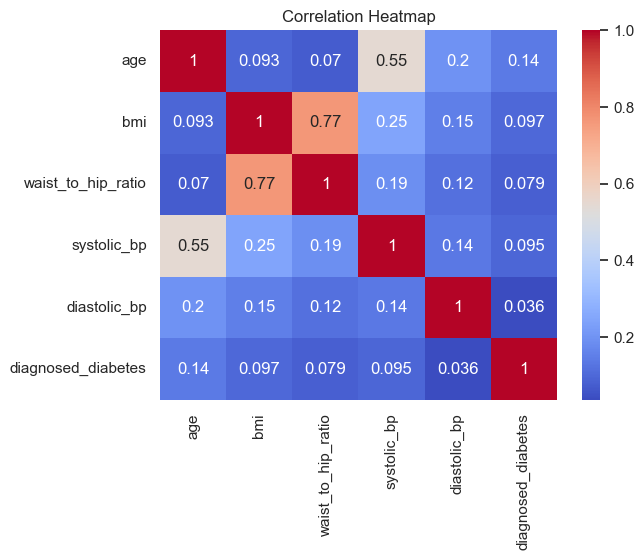

In [33]:
# Define numeric columns for correlation
corr_cols = ['age','bmi','waist_to_hip_ratio','systolic_bp','diastolic_bp']

# Compute correlation
corr = df[corr_cols + ['diagnosed_diabetes']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Insights
#### 1.Strong positive correlation between glucose_fasting, glucose_postprandial, hba1c, and diagnosed diabetes.
#### 2.BMI, waist-to-hip ratio, and insulin levels also positively correlate with diabetes.
#### 3.Lifestyle factors like diet_score, physical_activity_minutes_per_week, and sleep_hours_per_day show weaker correlations.
#### 4.Heatmap helps identify the strongest predictors for diabetes risk.